In [1]:
import math
import collections
import urllib

import numpy as np 
import pandas as pd 
import matplotlib.pyplot as pp

%matplotlib inline

In [2]:
import getweather

In [4]:
allyears = np.vstack([getweather.getyear('PASADENA', ['TMIN', 'TMAX'], year) for year in range(1910, 2019)])

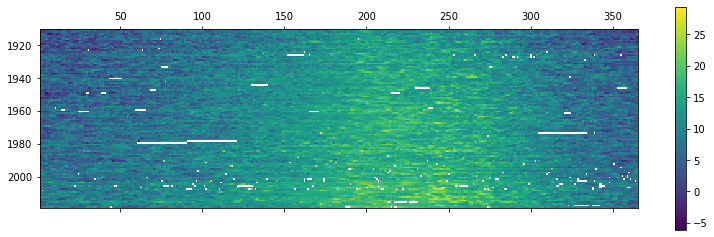

In [5]:
pp.matshow(allyears['TMIN'], extent=[1,365,2019,1910]) # add extent layer
pp.colorbar()

In [8]:
tmin_record = np.nanmin(allyears['TMIN'], axis=0)
tmax_record = np.nanmax(allyears['TMAX'], axis=0)

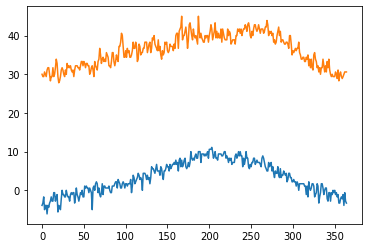

In [9]:
pp.plot(tmin_record)
pp.plot(tmax_record)

In [29]:
normal = np.vstack([getweather.getyear('PASADENA', ['TMIN', 'TMAX'], year) for year in range(1981, 2011)])

In [36]:
tmin_normal = np.nanmean(normal['TMIN'], axis=0)
tmax_normal = np.nanmean(normal['TMAX'], axis=0)

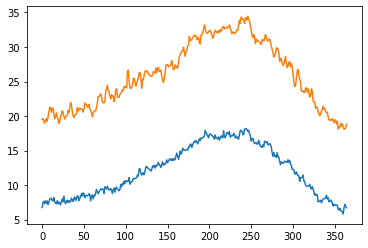

In [37]:
pp.plot(tmin_normal)
pp.plot(tmax_normal)

In [32]:
station, year = 'PASADENA', 2018

thisyear = getweather.getyear(station, ['TMIN', 'TMAX'], year)

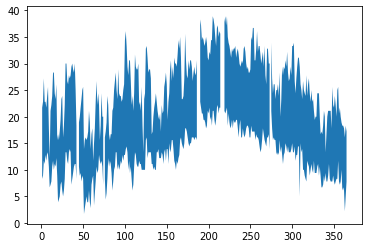

In [33]:
days = np.arange(1, 366)

pp.fill_between(days, thisyear['TMIN'], thisyear['TMAX'])

In [34]:
avg = 0.5*(np.nanmean(thisyear['TMIN']) + np.nanmean(thisyear['TMAX']))

In [19]:
f'{station}, {year}: average temperature = {avg:.2f} C'

'PASADENA, 2018: average temperature = 19.46 C'

Text(0.5, 1.0, 'PASADENA, 2018: average temperature = 19.46 C')

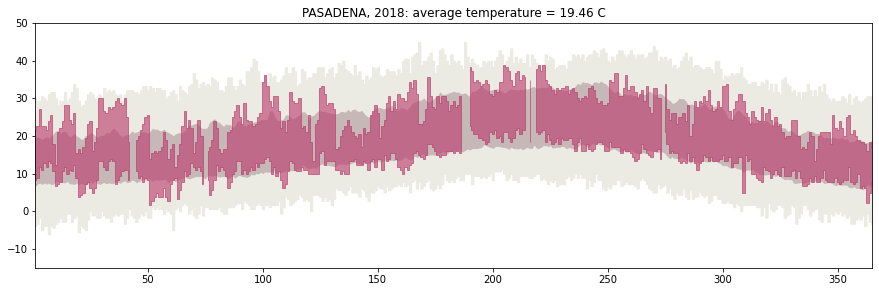

In [38]:
pp.figure(figsize=(15,4.5))

pp.fill_between(days, tmin_record, tmax_record, color=(0.92,0.92,0.89), step='mid')
pp.fill_between(days, tmin_normal, tmax_normal, color=(0.78,0.72,0.72))

pp.fill_between(days, thisyear['TMIN'], thisyear['TMAX'], color=(0.73,0.21,0.41), alpha=0.6, step='mid')
pp.axis(xmin=1, xmax= 365, ymin=-15, ymax=50)

pp.title(f'{station}, {year}: average temperature = {avg:.2f} C')

In [40]:
def nyplot(station, year):
    pp.figure(figsize=(15,4.5))
    
    allyears = np.vstack([getweather.getyear(station, ['TMIN', 'TMAX'], year) for year in range(1910, 2019)])
    normal = np.vstack([getweather.getyear(station, ['TMIN', 'TMAX'], year) for year in range(1981, 2011)])
    
    tmin_record, tmax_record = np.nanmin(allyears['TMIN'], axis=0), np.nanmax(allyears['TMAX'], axis=0)
    tmin_normal, tmax_normal = np.nanmean(normal['TMIN'], axis=0), np.nanmean(normal['TMAX'], axis=0)

    days = np.arange(1, 366)
    
    pp.fill_between(days, tmin_record, tmax_record, color=(0.92,0.92,0.89), step='mid')
    pp.fill_between(days, tmin_normal, tmax_normal, color=(0.78,0.72,0.72))
    
    thisyear = getweather.getyear(station, ['TMIN', 'TMAX'], year)

    pp.fill_between(days, thisyear['TMIN'], thisyear['TMAX'], color=(0.73,0.21,0.41), alpha=0.6, step='mid')
    pp.axis(xmin=1, xmax= 365, ymin=-15, ymax=50)
    
    avg = 0.5*(np.nanmean(thisyear['TMIN']) + np.nanmean(thisyear['TMAX']))
    pp.title(f'{station}, {year}: average temperature = {avg:.2f} C')

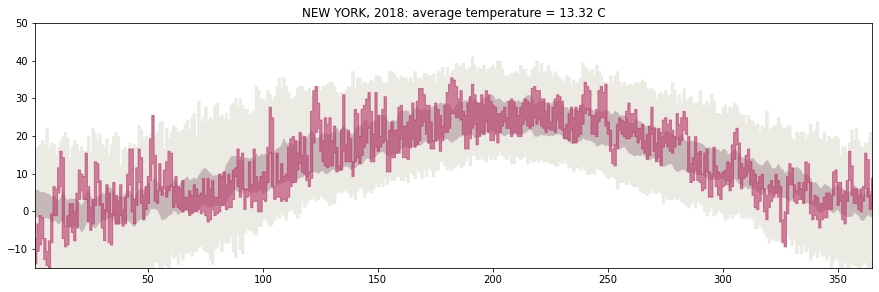

In [41]:
nyplot('NEW YORK', 2018)